### Задание 1.

Решите задачу распознавания лиц с помощью SVM с ядром. Попробуйте различные ядра: 'poly', 'rbf', 'sigmoid'.

Подберите гиперпараметры по кросс-валидации. 

SVM с каким ядром дал лучший результат?

In [62]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
faces = fetch_lfw_people(min_faces_per_person=57)
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


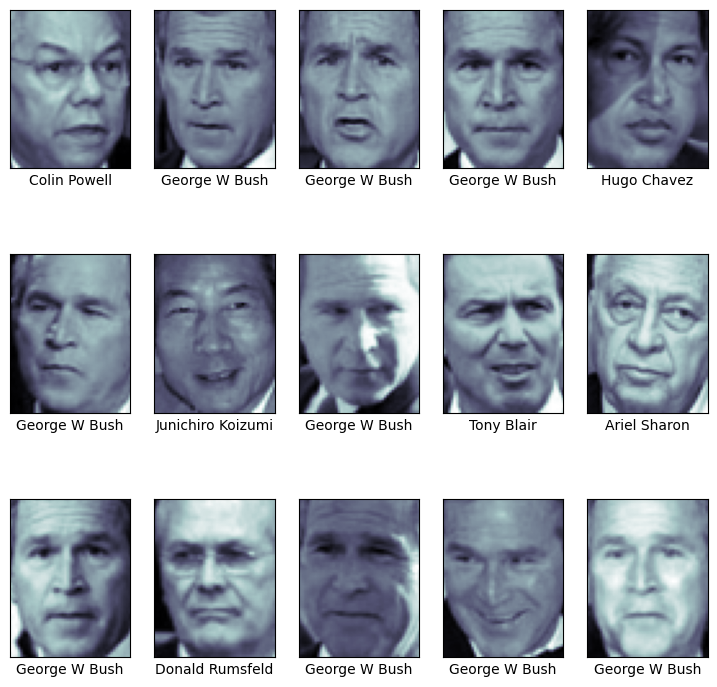

In [3]:
fig, ax = plt.subplots(3, 5, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [54]:
pipe = Pipeline([('pca', PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=179)), ('svc', SVC(class_weight='balanced'))])
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=179)

In [55]:
param_grid = {'svc__kernel': ['poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(pipe, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: total: 1min 10s
Wall time: 9.61 s
{'svc__kernel': 'rbf'}


In [56]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

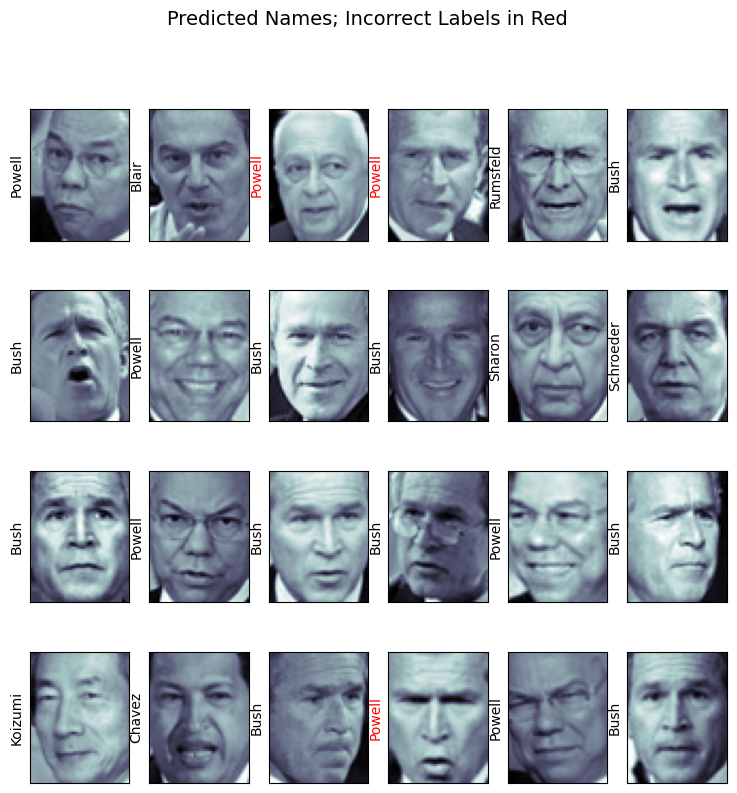

In [57]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [58]:
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.47      0.64        19
     Colin Powell       0.68      0.94      0.79        65
  Donald Rumsfeld       0.86      0.63      0.73        30
    George W Bush       0.82      0.87      0.84       122
Gerhard Schroeder       0.92      0.73      0.81        33
      Hugo Chavez       1.00      0.60      0.75        20
Junichiro Koizumi       1.00      0.82      0.90        11
       Tony Blair       0.82      0.89      0.86        37

         accuracy                           0.81       337
        macro avg       0.89      0.74      0.79       337
     weighted avg       0.83      0.81      0.81       337



Text(72.7222222222222, 0.5, 'predicted label')

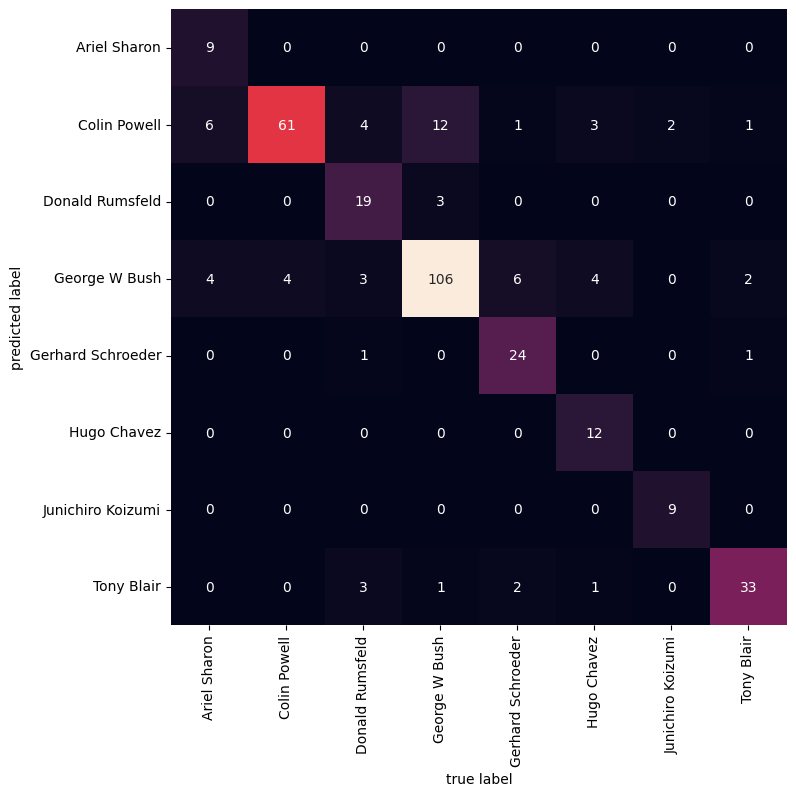

In [59]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [60]:
accuracy_score(yfit, ytest)

0.8100890207715133

### Задание 2.

Решите задачу распознавания лиц с помощью логистической регрессии (она также поддерживает опцию class_weight='balanced'):

1) Объявите модель, состоящую из pipeline(pca,logistic regression)

2) Подберите по сетке параметр C логистической регрессии (с помощью GridSearch)

3) Обучите модель на тренировочных данных и выведите наилучшие параметры модели

Какое качество показала эта модель?

In [11]:
pipe = Pipeline([('pca', PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=179)), ('lr', LogisticRegression())])
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=179)

In [12]:
param_grid = {'lr__C': np.logspace(-2, 6, 200)}
grid = GridSearchCV(pipe, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: total: 20min 31s
Wall time: 4min 6s
{'lr__C': 0.07663410868007459}


In [13]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

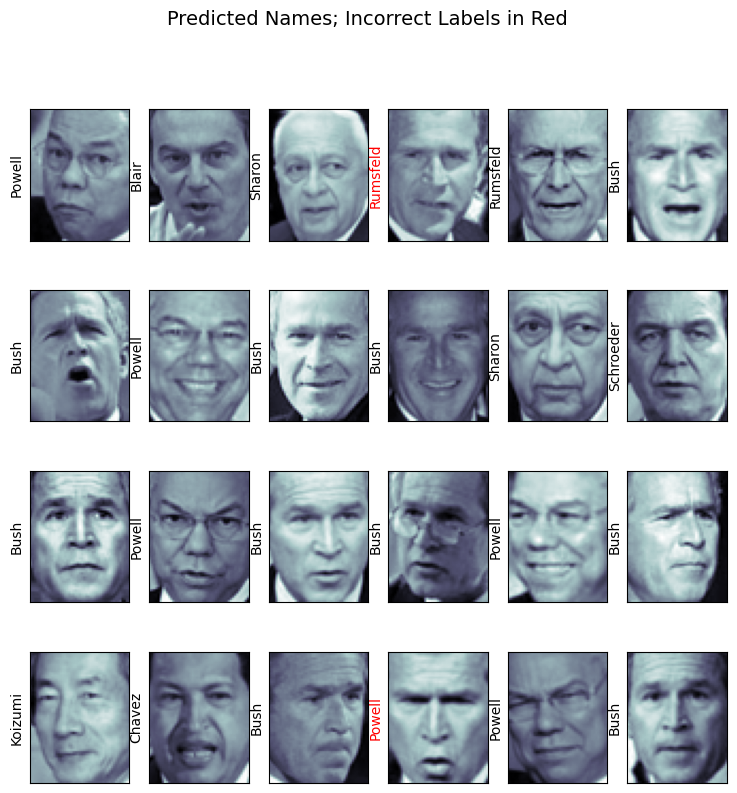

In [14]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [15]:
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.53      0.65        19
     Colin Powell       0.80      0.86      0.83        65
  Donald Rumsfeld       0.81      0.57      0.67        30
    George W Bush       0.81      0.89      0.85       122
Gerhard Schroeder       0.81      0.76      0.78        33
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.92      1.00      0.96        11
       Tony Blair       0.71      0.81      0.76        37

         accuracy                           0.80       337
        macro avg       0.82      0.76      0.78       337
     weighted avg       0.81      0.80      0.80       337



Text(72.7222222222222, 0.5, 'predicted label')

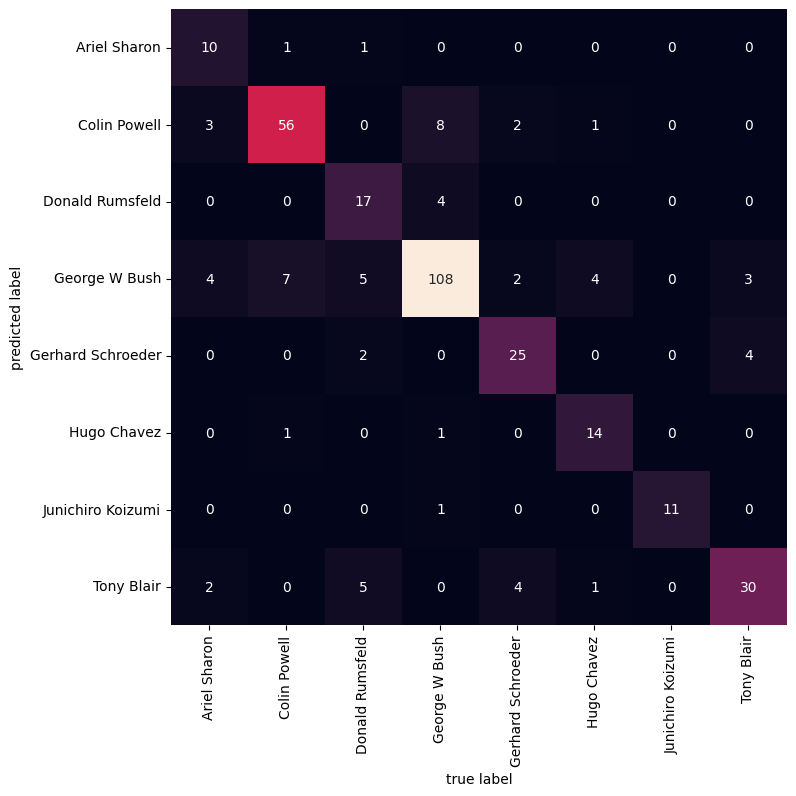

In [16]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [17]:
accuracy_score(yfit, ytest)

0.8041543026706232

### Задание 3.

Разбалловка:

- 5 баллов: обучили один алгоритм и погридсерчили
- 10 баллов: попробовали обучить два и более алгоритмов, погридсерчили

Поработайте с датасетом winequalityN (целевая переменная - quality). Поэкспериментируйте с алгоритмами классификации, попробуйте подобрать гиперпараметры для них. 

In [18]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [19]:
len(data)

6497

In [20]:
data.dropna(inplace=True)

In [21]:
len(data)

6463

In [22]:
data['type'].unique()

array(['white', 'red'], dtype=object)

In [23]:
data['type'] = data['type'].apply(lambda x: 0 if x == 'white' else 1)

In [24]:
X = data.drop(columns=['quality'])
y = data['quality']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=179)

Модель SVM.

In [25]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [26]:
param_grid = {'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(pipe, param_grid, n_jobs=-1)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: total: 766 ms
Wall time: 4.84 s
{'svc__kernel': 'rbf'}


In [27]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

In [28]:
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        47
           5       0.65      0.63      0.64       450
           6       0.54      0.74      0.62       558
           7       0.45      0.21      0.28       199
           8       0.00      0.00      0.00        35

    accuracy                           0.57      1293
   macro avg       0.27      0.26      0.26      1293
weighted avg       0.53      0.57      0.53      1293



c:\Users\Machenike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Machenike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Machenike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

Text(72.72222222222221, 0.5, 'predicted quality')

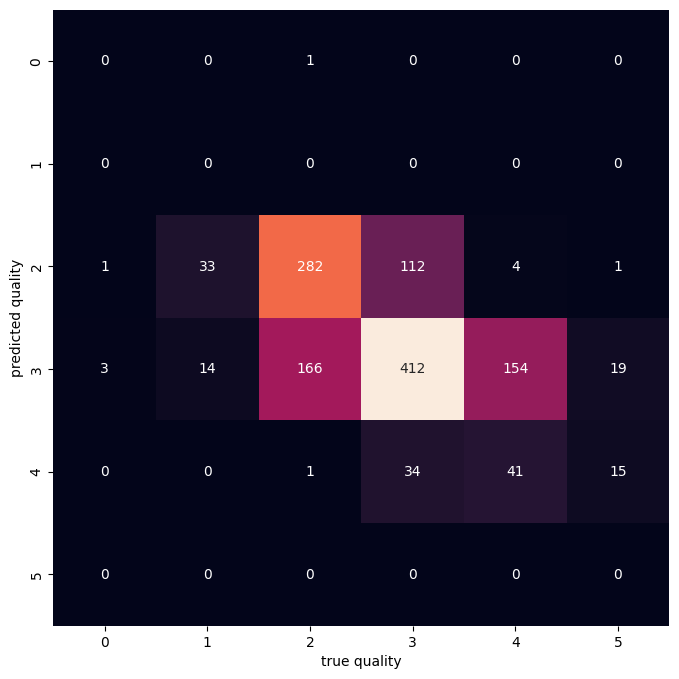

In [29]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true quality')
plt.ylabel('predicted quality')

In [30]:
accuracy_score(yfit, ytest)

0.568445475638051

In [31]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf'))])

In [32]:
param_grid = {'svc__C': np.logspace(-2, 6, 20)}
grid = GridSearchCV(pipe, param_grid, n_jobs=-1)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: total: 1.23 s
Wall time: 2min 12s
{'svc__C': 8.858667904100823}


In [33]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

In [34]:
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.44      0.09      0.14        47
           5       0.65      0.65      0.65       450
           6       0.56      0.71      0.63       558
           7       0.52      0.31      0.39       199
           8       0.40      0.06      0.10        35

    accuracy                           0.59      1293
   macro avg       0.43      0.30      0.32      1293
weighted avg       0.58      0.59      0.56      1293



Text(72.72222222222221, 0.5, 'predicted quality')

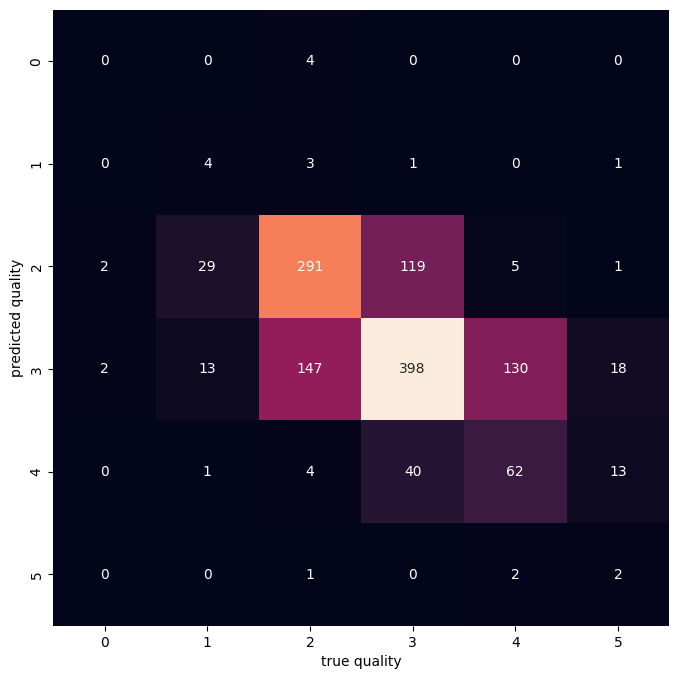

In [35]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true quality')
plt.ylabel('predicted quality')

In [36]:
accuracy_score(yfit, ytest)

0.5854601701469451

Логистическая регрессия.

In [37]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [38]:
param_grid = {'lr__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
grid = GridSearchCV(pipe1, param_grid, n_jobs=-1)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: total: 234 ms
Wall time: 709 ms
{'lr__solver': 'sag'}


c:\Users\Machenike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [39]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

In [40]:
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.33      0.04      0.08        47
           5       0.62      0.60      0.61       450
           6       0.53      0.71      0.61       558
           7       0.50      0.26      0.34       199
           8       0.00      0.00      0.00        35

    accuracy                           0.56      1293
   macro avg       0.33      0.27      0.27      1293
weighted avg       0.53      0.56      0.53      1293



c:\Users\Machenike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Machenike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Machenike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

Text(72.72222222222221, 0.5, 'predicted quality')

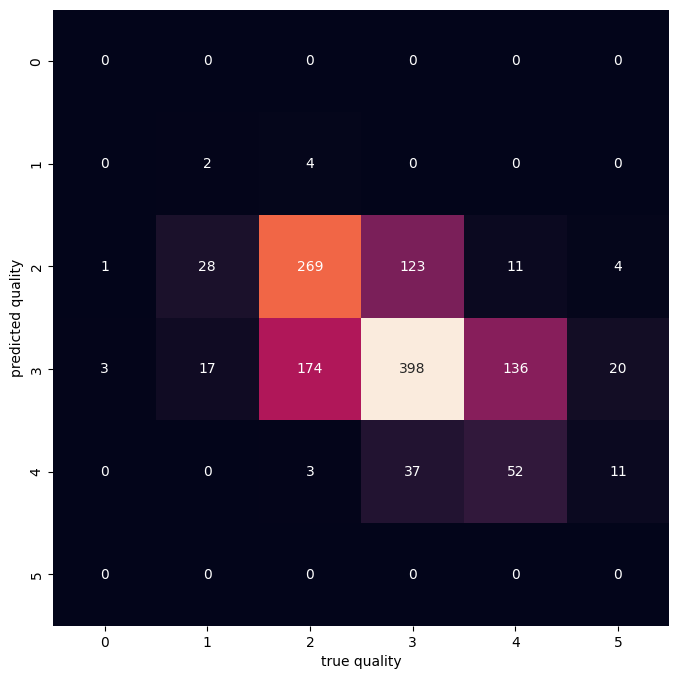

In [41]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true quality')
plt.ylabel('predicted quality')

In [42]:
accuracy_score(yfit, ytest)

0.5576179427687549

In [43]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(solver='sag'))])

In [44]:
param_grid = {'lr__C': np.logspace(-2, 6, 20)}
grid = GridSearchCV(pipe1, param_grid, n_jobs=-1)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: total: 391 ms
Wall time: 2.48 s
{'lr__C': 0.4832930238571752}


c:\Users\Machenike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [45]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

In [46]:
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.33      0.04      0.08        47
           5       0.62      0.60      0.61       450
           6       0.53      0.71      0.61       558
           7       0.50      0.26      0.34       199
           8       0.00      0.00      0.00        35

    accuracy                           0.56      1293
   macro avg       0.33      0.27      0.27      1293
weighted avg       0.53      0.56      0.53      1293



c:\Users\Machenike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Machenike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Machenike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

Text(72.72222222222221, 0.5, 'predicted quality')

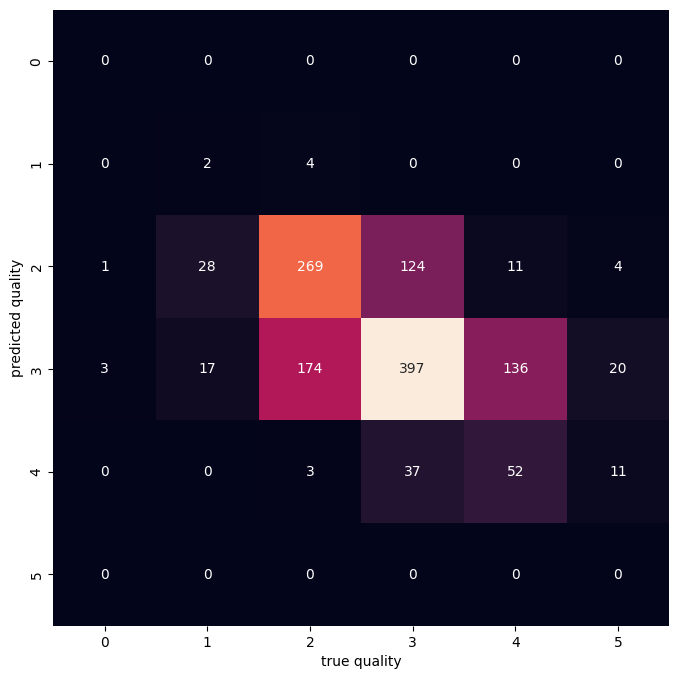

In [47]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true quality')
plt.ylabel('predicted quality')

In [48]:
accuracy_score(yfit, ytest)

0.5568445475638051

Дерево решений.

In [63]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])

In [64]:
param_grid = {'dt__max_depth': [None] + list(range(1, 21)), 'dt__min_samples_split': list(range(2, 21)), 'dt__min_samples_leaf': list(range(1, 21))}
grid = GridSearchCV(pipe2, param_grid, n_jobs=-1)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: total: 1min 25s
Wall time: 1h 12min 5s
{'dt__max_depth': 3, 'dt__min_samples_leaf': 20, 'dt__min_samples_split': 2}


In [65]:
model = grid.best_estimator_

yfit = model.predict(Xtest).astype(int)

Text(72.72222222222221, 0.5, 'predicted quality')

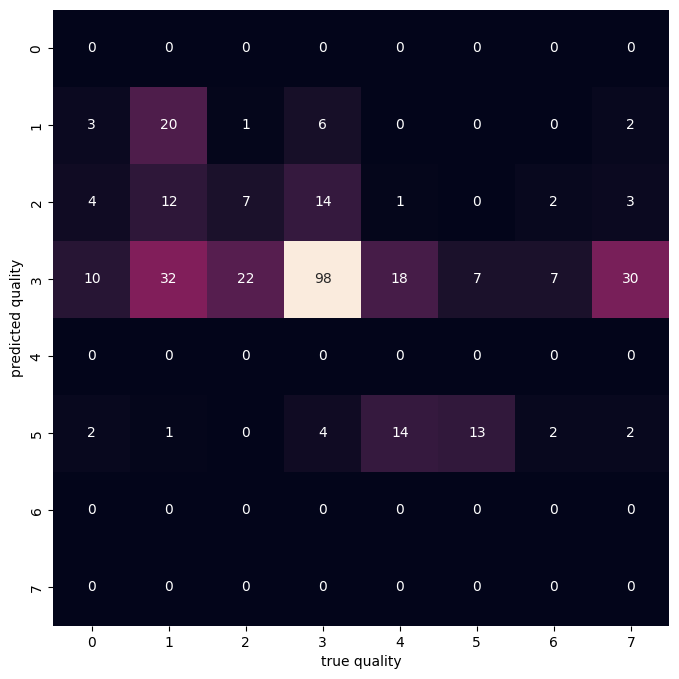

In [66]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true quality')
plt.ylabel('predicted quality')

In [67]:
accuracy_score(yfit, ytest)

0.4094955489614243